# Demosaicking

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import convolve

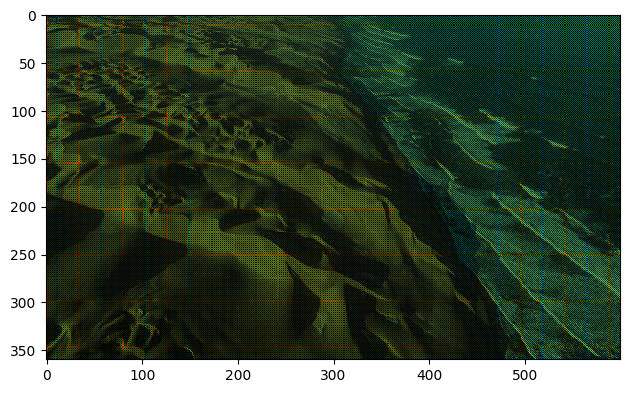

In [130]:
image = np.load("./CFA_NPY/Bayer/namib.npy")
io.imshow(image)

In [131]:
image.shape

(360, 600, 3)

## Bayer Mask

In [132]:
bayer_mask = np.array([
    [[0, 1],
     [0, 0]], # R
    [[1, 0],
     [0, 1]], # G
    [[0, 0],
     [1, 0]], # B
], dtype=np.uint8)
bayer_mask.shape

(3, 2, 2)

In [133]:
def color_filter(mask, shape):
    return np.dstack(
        [
            np.tile(mask[channel, :, :], np.asarray(shape) // mask.shape[1:-1])
            for channel in range(mask.shape[0])
        ]
    )

mask_filter = color_filter(bayer_mask, shape=image.shape[:-1])
print(mask_filter.shape, image.shape)

(360, 600, 3) (360, 600, 3)


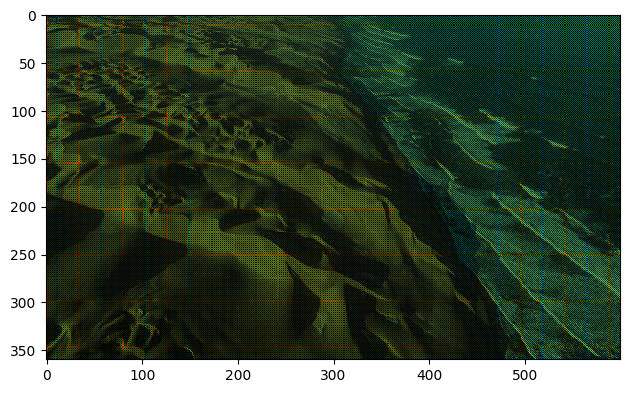

In [134]:
# It's not needed since we already have image with separate color filters
filtered_image = image * mask_filter
io.imshow(filtered_image)

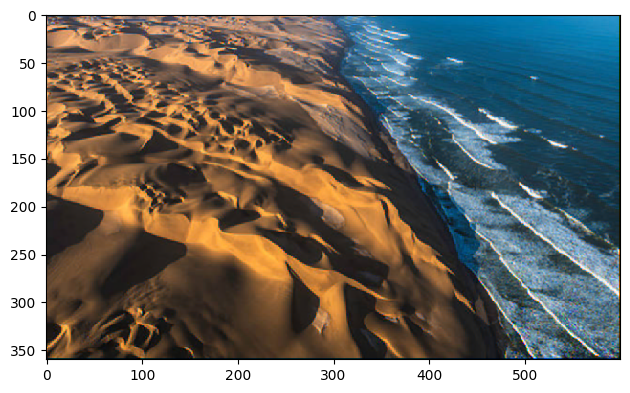

In [135]:
demosaicking_mask = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])

convolved_image = np.dstack([
    convolve(filtered_image[:, :, channel], demosaicking_mask[:, :, channel], mode='constant', cval=0.0)
    for channel in range(3)
])
io.imshow(convolved_image)

### Example with .jpg image

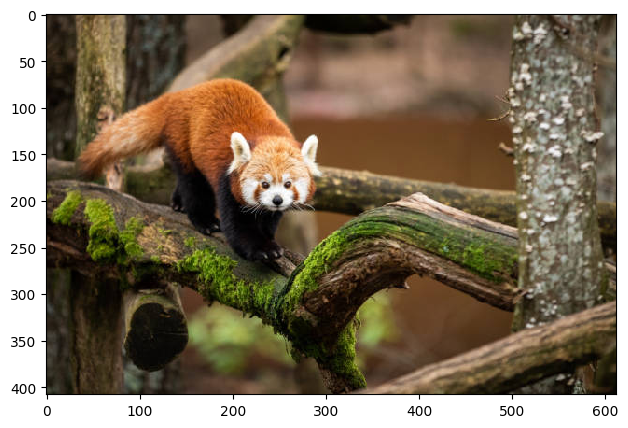

In [136]:
test_image = io.imread("./images/panda.jpg")
io.imshow(test_image)

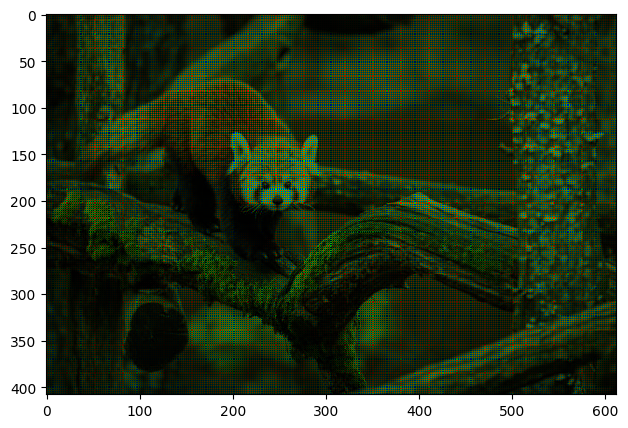

In [137]:
test_mask = color_filter(bayer_mask, shape=test_image.shape[:-1])
sensor_image = test_image * test_mask
io.imshow(sensor_image)

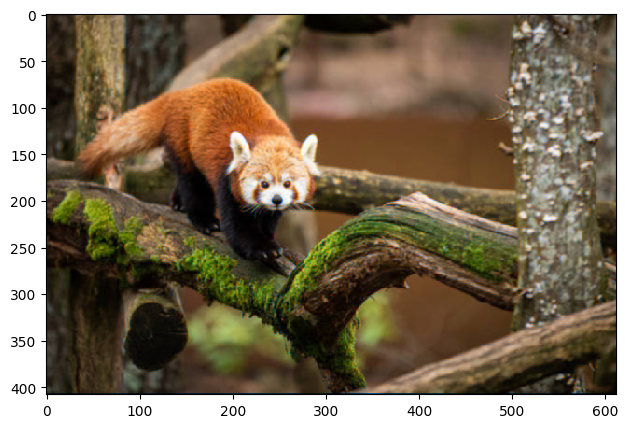

In [138]:
convolved_image = np.dstack([
    convolve(sensor_image[:, :, channel], demosaicking_mask[:, :, channel], mode='constant', cval=0.0)
    for channel in range(3)
])
io.imshow(convolved_image)

## FUJI X-trans filter

In [139]:
fuji_mask = np.array([
    [[0, 0, 1, 0, 0, 1],  # R
     [1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0],
     [0, 1, 0, 1, 0, 0],
     [1, 0, 0, 0, 0, 1],
     [0, 0, 1, 0, 0, 0]],

    [[1, 0, 0, 1, 0, 0],  # G
     [0, 1, 0, 0, 1, 0],
     [1, 0, 1, 0, 0, 1],
     [0, 0, 1, 0, 1, 0],
     [0, 1, 0, 1, 0, 0],
     [1, 0, 1, 0, 1, 0]],

    [[0, 1, 0, 0, 1, 0],  # B
     [0, 0, 0, 1, 0, 1],
     [0, 1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 1],
     [0, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 0, 0]],
], dtype=np.uint8)

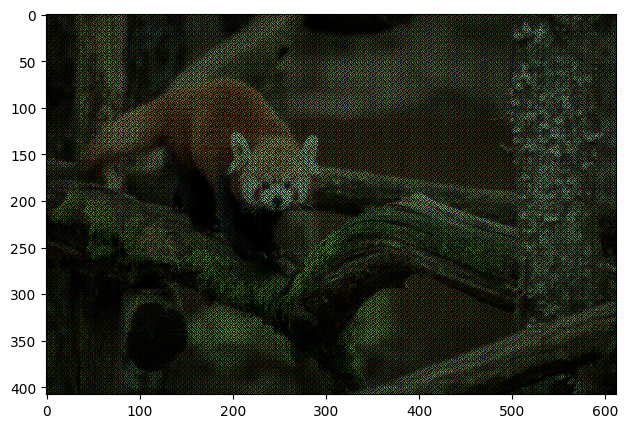

In [140]:
test_mask = color_filter(fuji_mask, shape=test_image.shape[:-1])
sensor_image = test_image * test_mask
io.imshow(sensor_image)

In [208]:
demosaicking_mask = np.dstack([
    np.ones((6, 6)) / 9,
    np.ones((6, 6)) / 14,
    np.ones((6, 6)) / 10
])

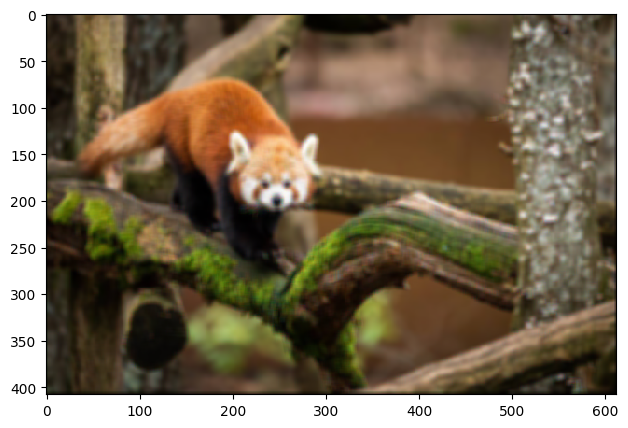

In [209]:
convolved_image = np.dstack([
    convolve(sensor_image[:, :, channel], demosaicking_mask[:, :, channel], mode='constant', cval=0.0)
    for channel in range(3)
])
io.imshow(convolved_image)